<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

fatal: destination path 'Project_DS' already exists and is not an empty directory.


In [3]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks
import numpy as np, joblib
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import layers, models
import xgboost as xgb
import lightgbm as lgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support
import numpy as np
import json

In [4]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [5]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [6]:
# Load arrays
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6, 222)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 6, 128)         │       179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,450 (915.82 KB)

 Trainable params: 234,450 (915.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.6012 - loss: 1.5216 - val_accuracy: 0.7056 - val_loss: 0.7297
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7332 - loss: 0.7082 - val_accuracy: 0.7411 - val_loss: 0.6622
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7518 - loss: 0.6474 - val_accuracy: 0.7868 - val_loss: 0.5860
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7740 - loss: 0.5862 - val_accuracy: 0.7970 - val_loss: 0.5330
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7900 - loss: 0.5213 - val_accuracy: 0.8173 - val_loss: 0.4764
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8078 - loss: 0.4806 - val_accuracy: 0.8325 - val_loss: 0.4310
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8031 - loss: 0.4695 - val_accuracy: 0.8223 - val_loss: 0.4509
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8246 - loss: 0.4258 - val_accu

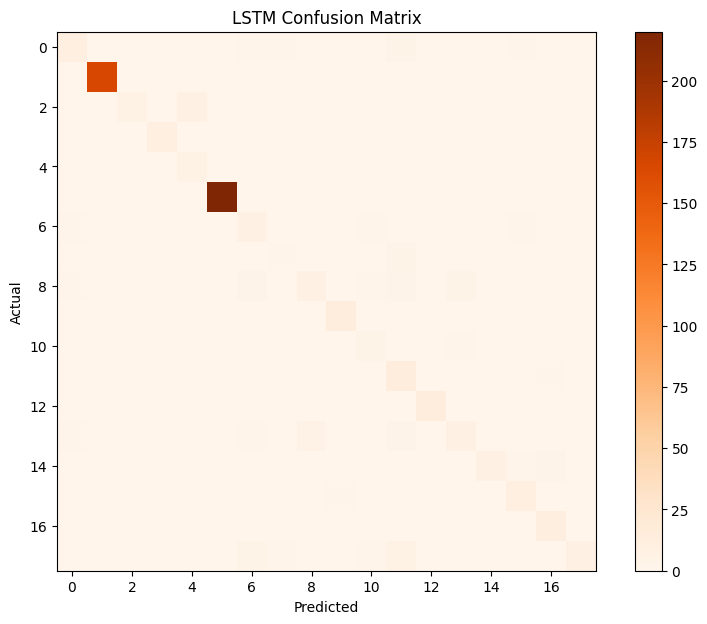

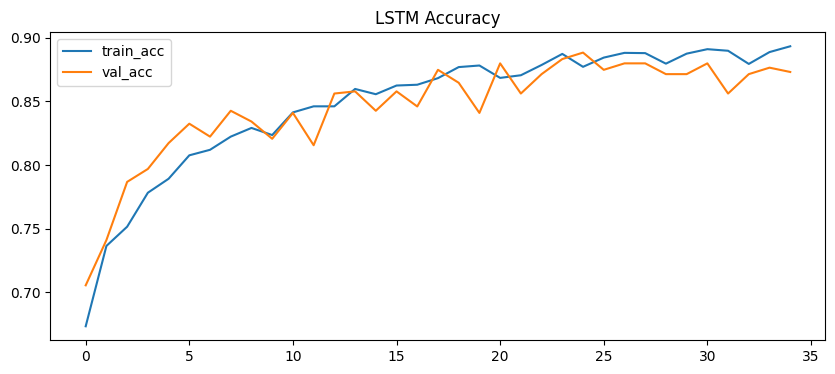

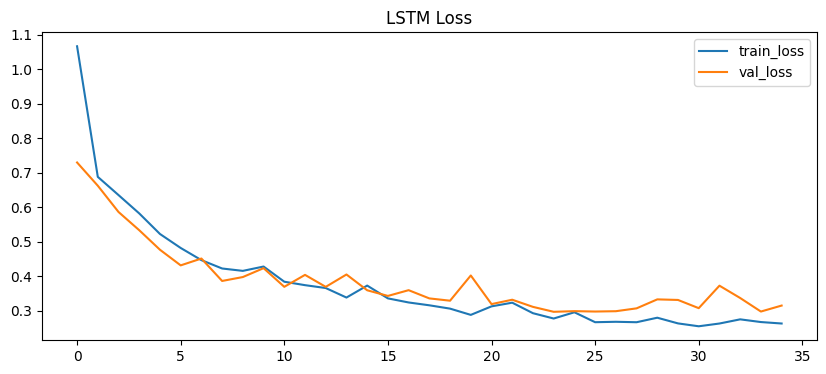

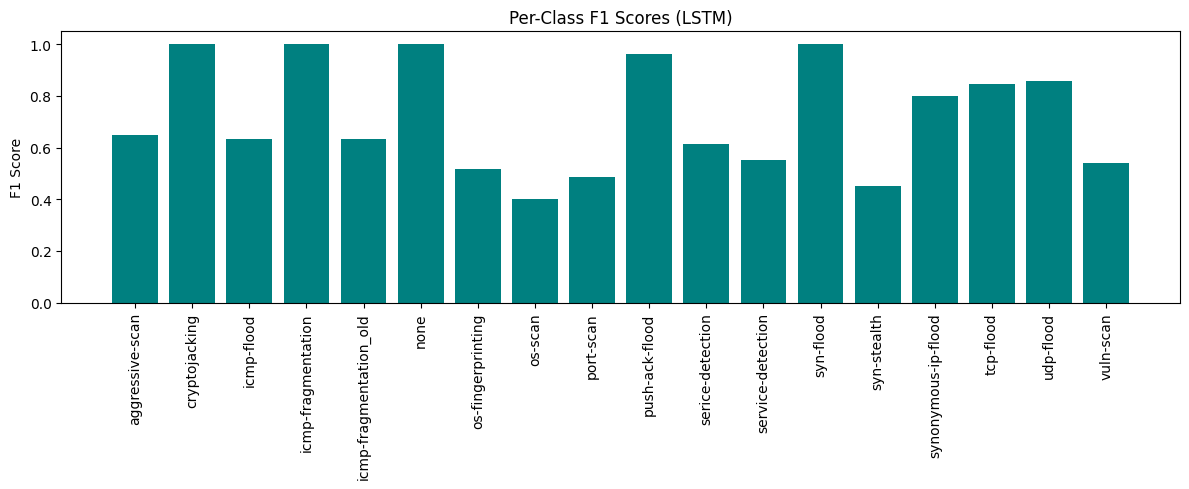

📂 Saved: LSTM model, results, confusion matrix, F1 plots


In [7]:
# ================================================================
# LSTM Model
# ================================================================


def build_lstm(window, n_features, n_classes, units=128, dropout=0.3):
    inputs = layers.Input(shape=(window, n_features))
    x = layers.LSTM(units, return_sequences=True)(inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LSTM(units//2)(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


lstm_model = build_lstm(X_train.shape[1], X_train.shape[2], len(classes))
lstm_model.summary()

# -----------------------
# Training
# -----------------------
early_stop = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------
# Evaluation
# -----------------------
y_val_pred = lstm_model.predict(X_val).argmax(axis=1)

acc_lstm = accuracy_score(y_val, y_val_pred)
f1_lstm = f1_score(y_val, y_val_pred, average="macro")
report_lstm = classification_report(y_val, y_val_pred, target_names=classes, zero_division=0)
cm_lstm = confusion_matrix(y_val, y_val_pred)

print("\n✅ LSTM Results")
print("Accuracy:", acc_lstm)
print("Macro-F1:", f1_lstm)
print(report_lstm)

# -----------------------
# Confusion Matrix
# -----------------------
plt.figure(figsize=(10, 7))
plt.imshow(cm_lstm, cmap="Oranges")
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# -----------------------
# Training Curves
# -----------------------
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history["accuracy"], label="train_acc")
plt.plot(history_lstm.history["val_accuracy"], label="val_acc")
plt.legend(); plt.title("LSTM Accuracy"); plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history["loss"], label="train_loss")
plt.plot(history_lstm.history["val_loss"], label="val_loss")
plt.legend(); plt.title("LSTM Loss"); plt.show()

# -----------------------
# Per-class F1 Plot
# -----------------------
prec, rec, f1, support = precision_recall_fscore_support(y_val, y_val_pred, zero_division=0)
plt.figure(figsize=(12, 5))
plt.bar(classes, f1, color="teal")
plt.xticks(rotation=90)
plt.title("Per-Class F1 Scores (LSTM)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.savefig("LSTM_f1_per_class.png")
plt.show()

# -----------------------
# Save Model & Results
# -----------------------
lstm_model.save("lstm_model.h5")

results_lstm = {
    "accuracy": float(acc_lstm),
    "macro_f1": float(f1_lstm),
    "report": report_lstm,
    "confusion_matrix": cm_lstm.tolist()
}
with open("results_lstm.json", "w") as f:
    json.dump(results_lstm, f, indent=4)

print("📂 Saved: LSTM model, results, confusion matrix, F1 plots")

Bidriectional LSTM

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 6, 222)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 6, 256)         │       359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,202 (2.03 MB)

 Trainable params: 533,202 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

✅ Class Weights: {0: np.float64(1.8524904214559388), 1: np.float64(0.1967846967846968), 2: np.float64(2.633442265795207), 3: np.float64(2.827485380116959), 4: np.float64(5.481859410430839), 5: np.float64(0.14662178554099953), 6: np.float64(2.7409297052154193), 7: np.float64(5.715130023640662), 8: np.float64(1.6788194444444444), 9: np.float64(2.633442265795207), 10: np.float64(5.596064814814815), 11: np.float64(2.41991991991992), 12: np.float64(2.686111111111111), 13: np.float64(1.9897119341563787), 14: np.float64(2.7409297052154193), 15: np.float64(2.71324354657688), 16: np.float64(2.7980324074074074), 17: np.float64(1.7556281771968048)}
Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.5962 - loss: 2.3742 - val_accuracy: 0.7191 - val_loss: 0.7113
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7564 - loss: 1.6520 - val_accuracy: 0.7648 - val_loss: 0.6029
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7906 - loss: 1.3541 - val_a

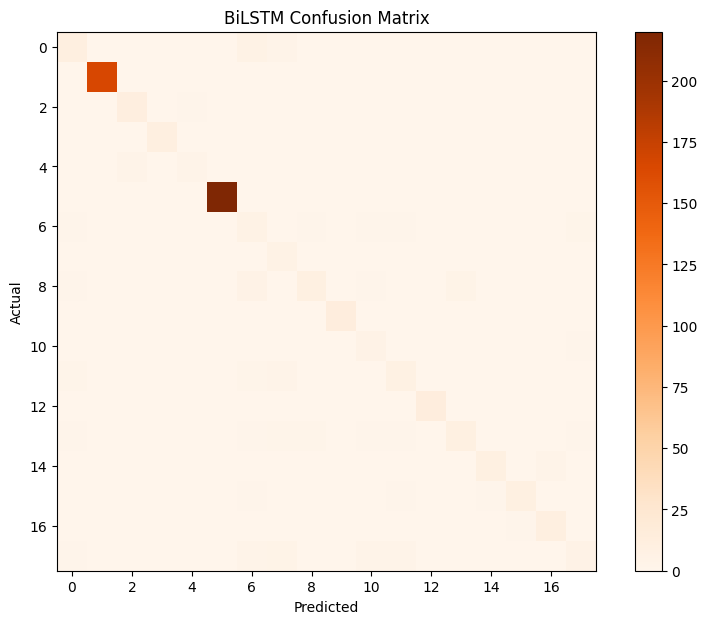

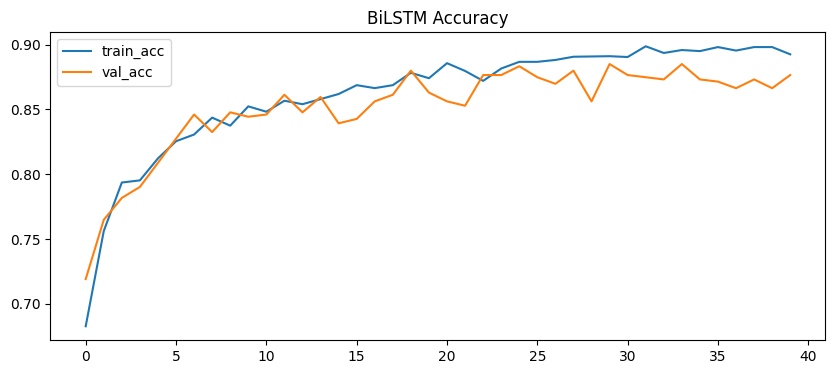

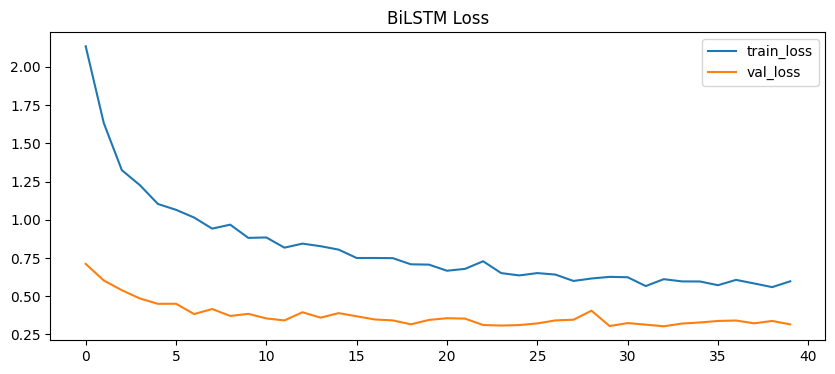

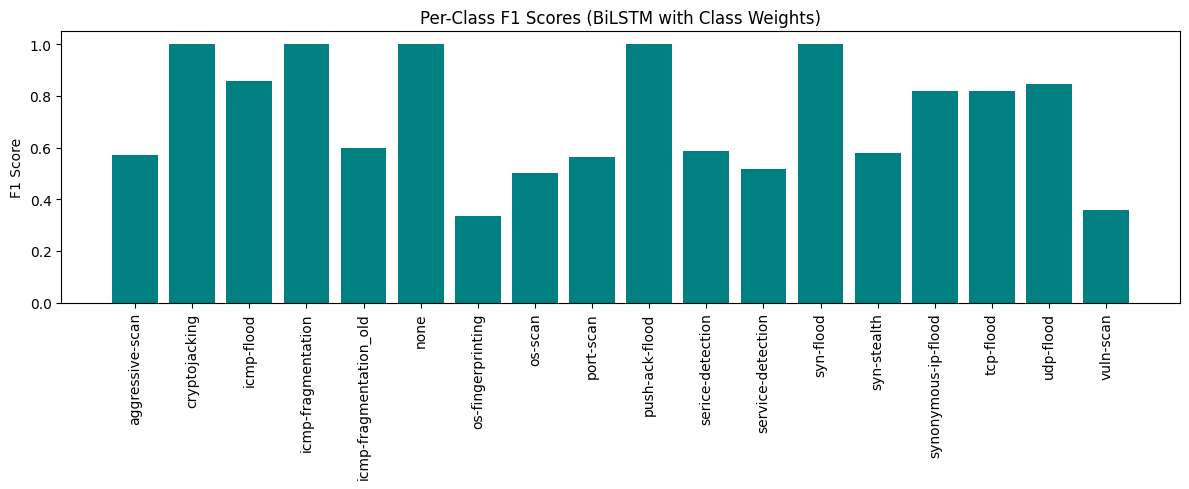

📂 Saved: BiLSTM model, results, confusion matrix, F1 plots


In [9]:
# ================================================================
# BiLSTM Model with Class Weights
# ================================================================
from tensorflow.keras import layers, models, callbacks
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import json

# -----------------------
# Define BiLSTM Model
# -----------------------
def build_bilstm(window, n_features, n_classes, units=128, dropout=0.3):
    inputs = layers.Input(shape=(window, n_features))
    x = layers.Bidirectional(layers.LSTM(units, return_sequences=True))(inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.Bidirectional(layers.LSTM(units // 2))(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


bilstm_model = build_bilstm(X_train.shape[1], X_train.shape[2], len(classes))
bilstm_model.summary()

# -----------------------
# Compute Class Weights
# -----------------------
weights = compute_class_weight(class_weight="balanced",
                               classes=np.unique(y_train),
                               y=y_train)
class_weight = {i: w for i, w in enumerate(weights)}
print("✅ Class Weights:", class_weight)

# -----------------------
# Training
# -----------------------
early_stop = callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history_bilstm = bilstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1,
    class_weight=class_weight
)

# -----------------------
# Evaluation
# -----------------------
y_val_pred = bilstm_model.predict(X_val).argmax(axis=1)

acc_bilstm = accuracy_score(y_val, y_val_pred)
f1_bilstm = f1_score(y_val, y_val_pred, average="macro")
report_bilstm = classification_report(y_val, y_val_pred, target_names=classes, zero_division=0)
cm_bilstm = confusion_matrix(y_val, y_val_pred)

print("\n✅ BiLSTM Results (with Class Weights)")
print("Accuracy:", acc_bilstm)
print("Macro-F1:", f1_bilstm)
print(report_bilstm)

# -----------------------
# Confusion Matrix
# -----------------------
plt.figure(figsize=(10, 7))
plt.imshow(cm_bilstm, cmap="Oranges")
plt.title("BiLSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# -----------------------
# Training Curves
# -----------------------
plt.figure(figsize=(10, 4))
plt.plot(history_bilstm.history["accuracy"], label="train_acc")
plt.plot(history_bilstm.history["val_accuracy"], label="val_acc")
plt.legend(); plt.title("BiLSTM Accuracy"); plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history_bilstm.history["loss"], label="train_loss")
plt.plot(history_bilstm.history["val_loss"], label="val_loss")
plt.legend(); plt.title("BiLSTM Loss"); plt.show()

# -----------------------
# Per-class F1 Plot
# -----------------------
prec, rec, f1, support = precision_recall_fscore_support(y_val, y_val_pred, zero_division=0)
plt.figure(figsize=(12, 5))
plt.bar(classes, f1, color="teal")
plt.xticks(rotation=90)
plt.title("Per-Class F1 Scores (BiLSTM with Class Weights)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.savefig("BiLSTM_f1_per_class.png")
plt.show()

# -----------------------
# Save Model & Results
# -----------------------
bilstm_model.save("bilstm_model.h5")

results_bilstm = {
    "accuracy": float(acc_bilstm),
    "macro_f1": float(f1_bilstm),
    "report": report_bilstm,
    "confusion_matrix": cm_bilstm.tolist()
}
with open("results_bilstm.json", "w") as f:
    json.dump(results_bilstm, f, indent=4)

print("📂 Saved: BiLSTM model, results, confusion matrix, F1 plots")